# 2 - QAOA



In [1]:
pip install qiskit==0.39.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pylatexenc==2.10

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit-optimization==0.4.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


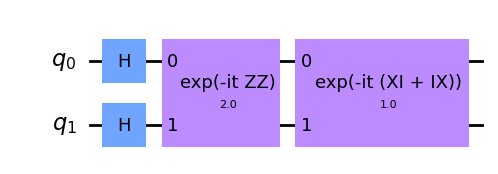

In [5]:
from qiskit.opflow import Z
from qiskit.algorithms import QAOA

H1 = Z^Z # Define Z_0Z_1
qaoa = QAOA()
circuit = qaoa.construct_circuit([1,2],H1)[0]
circuit.draw(output="mpl")

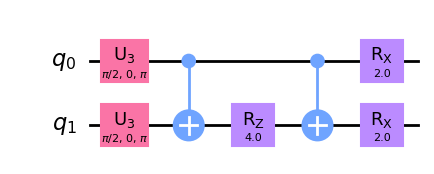

In [6]:
circuit.decompose().decompose().draw(output="mpl")


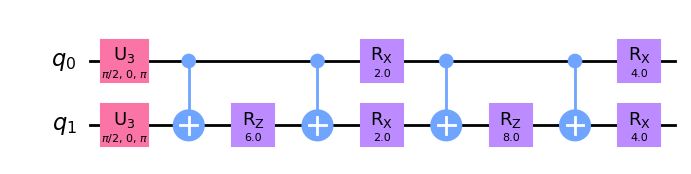

In [7]:
qaoa = QAOA(reps = 2)
circuit = qaoa.construct_circuit([1,2,3,4],H1)[0]
circuit.decompose().decompose().draw(output="mpl")

In [8]:
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit import Aer
from qiskit.algorithms.optimizers import COBYLA

seed = 1234
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
                   seed_simulator=seed, seed_transpiler=seed,
                   shots = 10)
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 20,
    'eigenstate': {'01': 0.5477225575051661, '10': 0.8366600265340756},
    'eigenvalue': (-1+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(β[0]): 6.7647519845416655,
                              ParameterVectorElement(γ[0]): -0.847240391875931},
    'optimal_point': array([ 6.76475198, -0.84724039]),
    'optimal_value': -1.0,
    'optimizer_evals': None,
    'optimizer_result': None,
    'optimizer_time': 0.08864736557006836}


In [9]:
from qiskit_optimization.problems import QuadraticProgram

qp = QuadraticProgram()
qp.binary_var('x')
qp.binary_var('y')
qp.binary_var('z')

qp.minimize(linear = {'y':-1}, quadratic = {('x','y'):2, ('z','y'):-4})
qp.linear_constraint(linear = {'x':1, 'y':2, 'z':3},
    sense ="<=", rhs = 5)

print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - y + [ 4 x*y - 8 y*z ]/2
Subject To
 c0: x + 2 y + 3 z <= 5

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1

Binaries
 x y z
End



In [10]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
np_solver = NumPyMinimumEigensolver()
np_optimizer = MinimumEigenOptimizer(np_solver)
result = np_optimizer.solve(qp)
print(result)

fval=-5.0, x=0.0, y=1.0, z=1.0, status=SUCCESS


In [11]:
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
    shots = 1024)
qaoa = QAOA(optimizer = COBYLA(),
    quantum_instance=quantum_instance, reps = 1)
qaoa_optimizer = MinimumEigenOptimizer(qaoa)
result = qaoa_optimizer.solve(qp)
print(result)

fval=-5.0, x=0.0, y=1.0, z=1.0, status=SUCCESS


In [12]:
print('Variable order:', [var.name for var in result.variables])
for s in result.samples:
    print(s)

Variable order: ['x', 'y', 'z']
SolutionSample(x=array([0., 1., 1.]), fval=-5.0, probability=0.1669921875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([0., 1., 0.]), fval=-1.0, probability=0.107421875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 0., 1.]), fval=0.0, probability=0.0546875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([0., 0., 1.]), fval=0.0, probability=0.087890625, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 0., 0.]), fval=0.0, probability=0.12890625, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([0., 0., 0.]), fval=0.0, probability=0.185546875, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 1., 0.]), fval=1.0, probability=0.08984375, status=<OptimizationResultStatus.SUCCESS: 0>)
SolutionSample(x=array([1., 1., 1.]), fval=-3.0, probability=0.1787109375, status=<OptimizationResultStatus.INFEASIBLE: 2>)


In [13]:
print(result.min_eigen_solver_result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 27,
    'eigenstate': {   '000000': 0.184877493221863,
                      '000011': 0.125,
                      '000100': 0.06987712429686843,
                      '000110': 0.3336586953759785,
                      '000111': 0.10364452469860624,
                      '001000': 0.03125,
                      '001001': 0.08838834764831845,
                      '001010': 0.08838834764831845,
                      '001100': 0.11267347735824966,
                      '001101': 0.10825317547305482,
                      '001110': 0.08838834764831845,
                      '001111': 0.38273277230987157,
                      '010000': 0.09882117688026186,
                      '010010': 0.19764235376052372,
                      '010100': 0.0625,
                      '010101': 0.06987712429686843,
                      '010110': 0.10364452469860624,
                      '010111': 0.09375,
                      '011000':

In [14]:
from qiskit_optimization.converters import QuadraticProgramToQubo
qp_to_qubo = QuadraticProgramToQubo()
qubo = qp_to_qubo.convert(qp)
print(qubo.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - 80 x - 161 y - 240 z - 80 c0@int_slack@0 - 160 c0@int_slack@1
      - 160 c0@int_slack@2 + [ 16 x^2 + 68 x*y + 96 x*z + 32 x*c0@int_slack@0
      + 64 x*c0@int_slack@1 + 64 x*c0@int_slack@2 + 64 y^2 + 184 y*z
      + 64 y*c0@int_slack@0 + 128 y*c0@int_slack@1 + 128 y*c0@int_slack@2
      + 144 z^2 + 96 z*c0@int_slack@0 + 192 z*c0@int_slack@1
      + 192 z*c0@int_slack@2 + 16 c0@int_slack@0^2
      + 64 c0@int_slack@0*c0@int_slack@1 + 64 c0@int_slack@0*c0@int_slack@2
      + 64 c0@int_slack@1^2 + 128 c0@int_slack@1*c0@int_slack@2
      + 64 c0@int_slack@2^2 ]/2 + 200
Subject To

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1
 0 <= c0@int_slack@0 <= 1
 0 <= c0@int_slack@1 <= 1
 0 <= c0@int_slack@2 <= 1

Binaries
 x y z c0@int_slack@0 c0@int_slack@1 c0@int_slack@2
End



In [15]:
H1, offset = qubo.to_ising()
print("The Hamiltonian is", H1)
print("The constant term is", offset)

The Hamiltonian is -7.0 * IIIIZI
- 4.5 * IIIIIZ
- 11.0 * IIIZII
- 4.0 * IIZIII
- 8.0 * IZIIII
- 8.0 * ZIIIII
+ 8.5 * IIIIZZ
+ 12.0 * IIIZIZ
+ 4.0 * IIZIIZ
+ 8.0 * IZIIIZ
+ 8.0 * ZIIIIZ
+ 23.0 * IIIZZI
+ 8.0 * IIZIZI
+ 16.0 * IZIIZI
+ 16.0 * ZIIIZI
+ 12.0 * IIZZII
+ 24.0 * IZIZII
+ 24.0 * ZIIZII
+ 8.0 * IZZIII
+ 8.0 * ZIZIII
+ 16.0 * ZZIIII
The constant term is 47.0
